In [61]:
import sys
import time
from kid_readout.equipment import lockin_controller, hittite_controller

In [2]:
lockin = lockin_controller.lockinController()
hittite = hittite_controller.hittiteController()

In [3]:
lockin.get_data()

(0, 0, 0, 0)

The Hittite power is 0 dBm for all measurements, and the attenuators are set to 2 turns each.

In [ ]:
frequency = 1e9 * np.linspace(140, 165, 1000)
power = 0  # dBm
hittite.set_power(power)

In [69]:
def acquire(frequency, verbose=False):
    data = np.zeros_like(frequency)
    print('')
    for i, f in enumerate(frequency):
        hittite.set_freq(f / 12)
        time.sleep(0.5)
        x, y, r, theta = lockin.get_data()
        data[i] = x
        if verbose:
                sys.stdout.write('\r{:.3f} GHz: {:.3f} uV    '.format(1e-9 * f, 1e6 * x))
                sys.stdout.flush()
    return data

This measurement was done with the horn aperture about 1 cm below the eccosorb. The horn was approximately centered, and the exact location was chosen by finding the peak signal with the source in broadband mode.

In [19]:
centered = acquire(frequency)

This measurement was done by translating the horn a few cm away from the symmetry plane of the optics.

In [ ]:
offset = acquire(frequency)

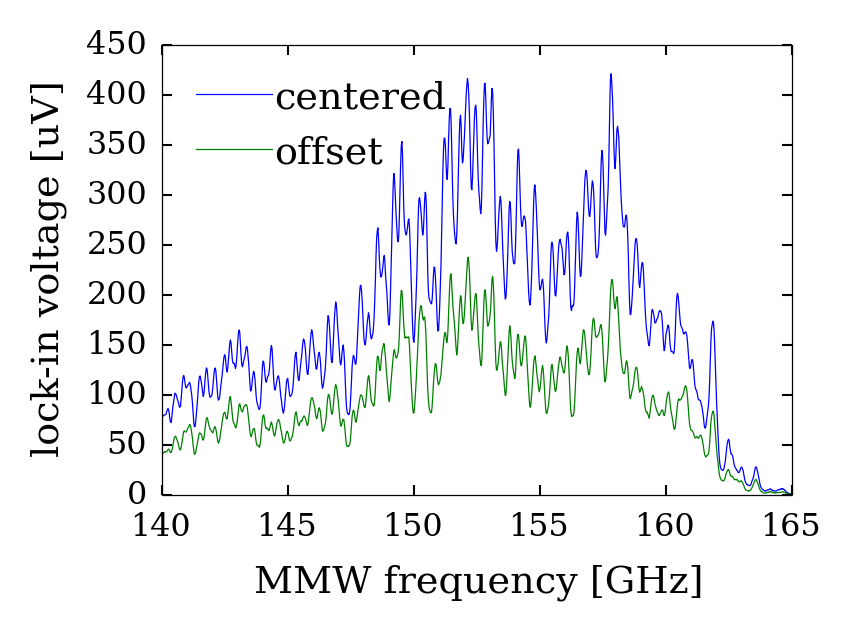

In [100]:
plt.plot(1e-9 * frequency, 1e6 * centered, label='centered')
plt.plot(1e-9 * frequency, 1e6 * offset, label='offset')

plt.xlabel('MMW frequency [GHz]')
plt.ylabel('lock-in voltage [uV]')
plt.legend(loc='best');

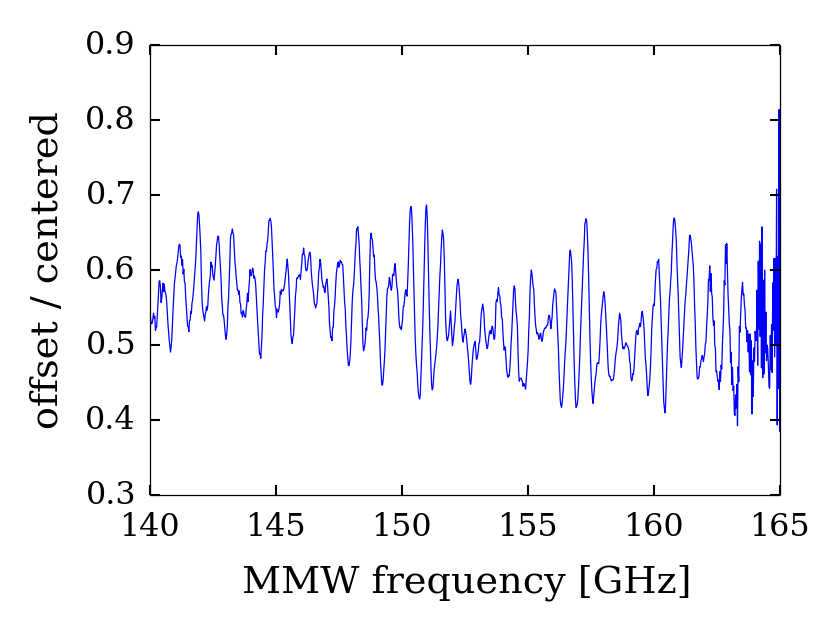

In [101]:
plt.plot(1e-9 * frequency, offset / centered)
plt.xlabel('MMW frequency [GHz]')
plt.ylabel('offset / centered');

Examine the fringes.

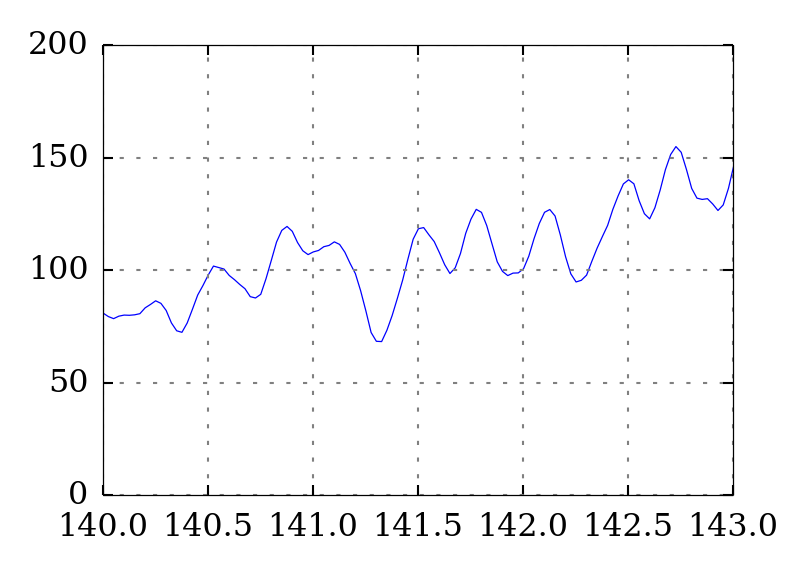

In [43]:
plt.plot(1e-9 * frequency, 1e6 * response)
plt.xlim(140, 143)
plt.ylim(0, 200)
plt.grid()

The fringe period of the centered data is about 0.3 GHz.

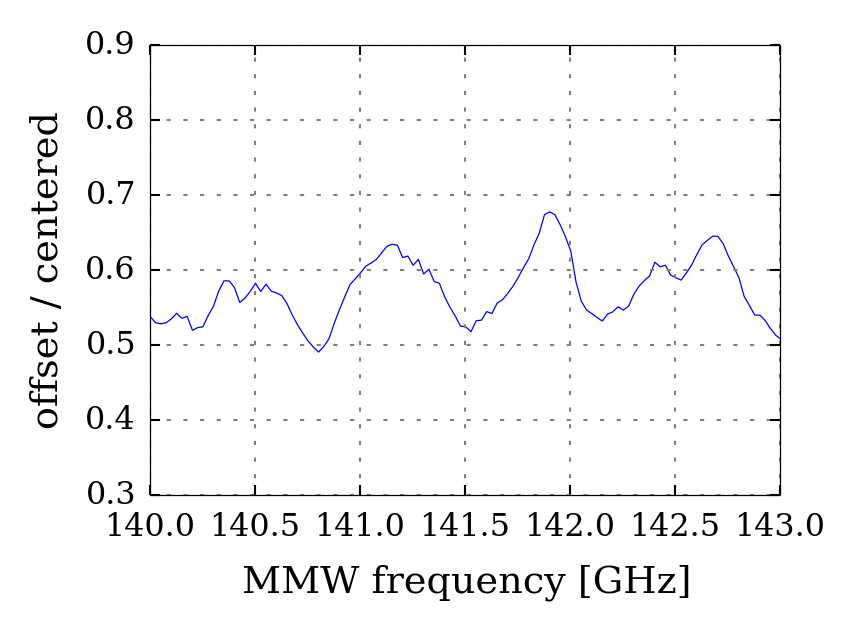

In [103]:
plt.plot(1e-9 * frequency, offset / centered)
plt.xlim(140, 143)
plt.grid()
plt.xlabel('MMW frequency [GHz]')
plt.ylabel('offset / centered');

The fringe period of the ratio is about 0.6 GHz.

In [56]:
without_filter = acquire(frequency)

In [49]:
with_filter = acquire(frequency)

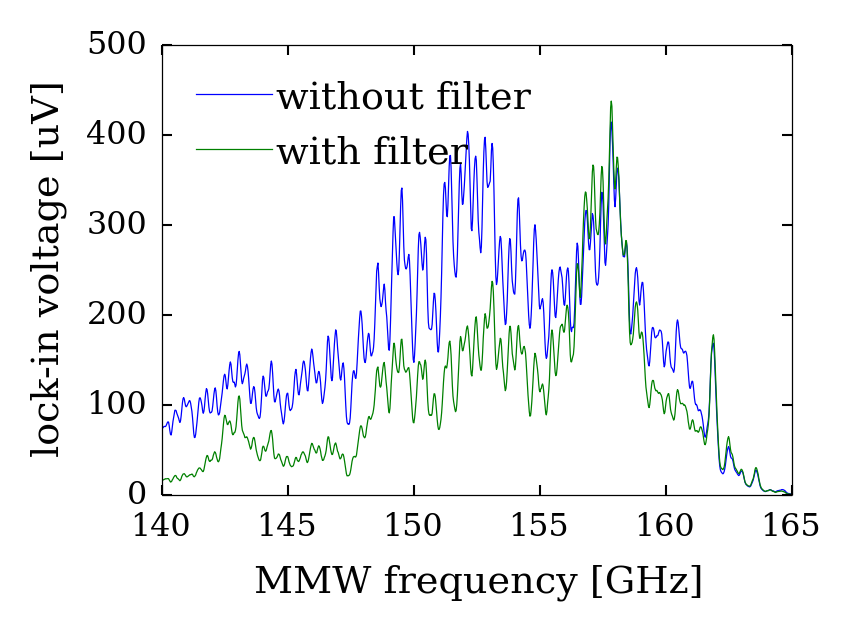

In [105]:
plt.plot(1e-9 * frequency, 1e6 * without_filter, label='without filter')
plt.plot(1e-9 * frequency, 1e6 * with_filter, label='with filter')

plt.ylim(0, 500)
plt.xlabel('MMW frequency [GHz]')
plt.ylabel('lock-in voltage [uV]')
plt.legend(loc='best');

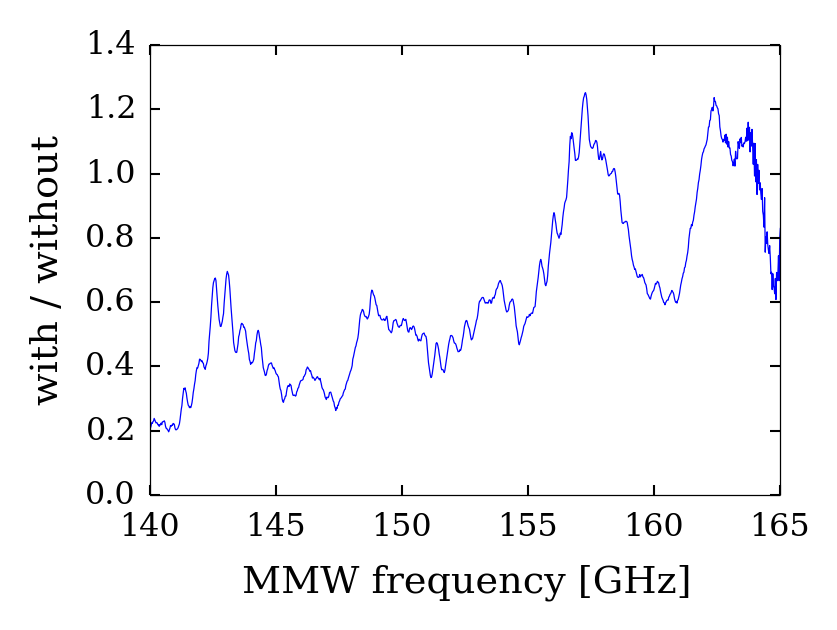

In [106]:
plt.plot(1e-9 * frequency, with_filter / without_filter)
plt.xlabel('MMW frequency [GHz]')
plt.ylabel('with / without');

These are the nominal band edges for the filter:

In [53]:
160 * (1 - 0.077/2)

153.84

In [54]:
160 * (1 + 0.077/2)

166.16

For these tests the eccosorb and horn aperture are separated by about 2.5 cm. The filter holder is angled a few degrees with its normal out of the optics symmetry plane to discourage standing waves.

The filter is removed and the holder is about 2.5 cm from both the eccosorb and horn aperture.

In [65]:
separated_without_filter = acquire(frequency, verbose=True)

The filter is placed on the holder.

In [70]:
separated_with_filter = acquire(frequency, verbose=True)


165.000 GHz: 0.745 uV    

The filter and holder are moved to about 0.5 cm from the horn aperture.

In [87]:
separated_filter_close_to_horn = acquire(frequency, verbose=True)


165.000 GHz: 0.566 uV    

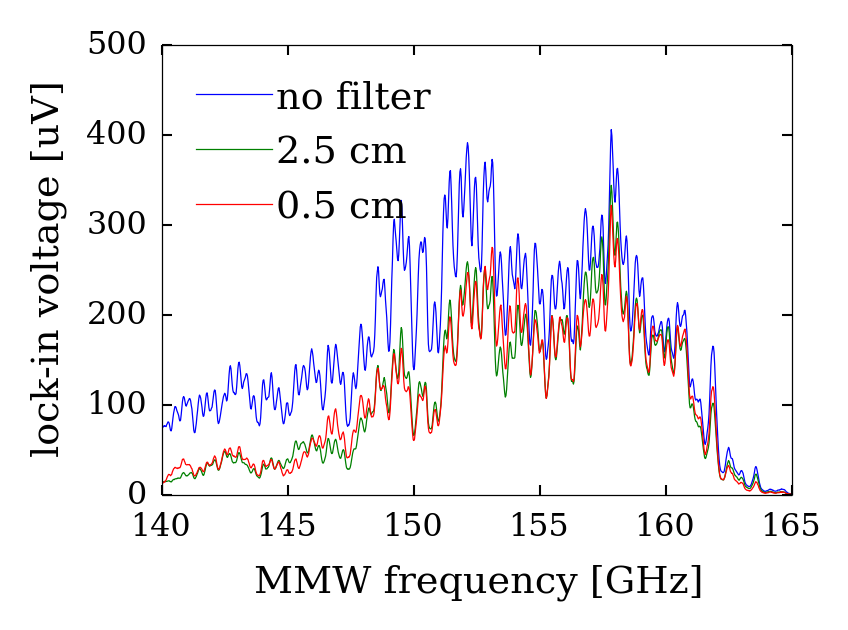

In [109]:
plt.plot(1e-9 * frequency, 1e6 * separated_without_filter, label='no filter')
plt.plot(1e-9 * frequency, 1e6 * separated_with_filter, label='2.5 cm')
plt.plot(1e-9 * frequency, 1e6 * separated_filter_close_to_horn, label='0.5 cm')

plt.ylim(0, 500)
plt.xlabel('MMW frequency [GHz]')
plt.ylabel('lock-in voltage [uV]')
plt.legend(loc='best');

Overplot a single-pole response:
$$
A = \frac{A_0}{1 + ((f-f0) / \Delta f)^2},
$$
with $\Delta f = (0.077 / 2) \; 160 \, \mathrm{GHz} = 6 \, \mathrm{GHz}$. This assumes that the nominal band refers to the half-power point, not the half-field point.

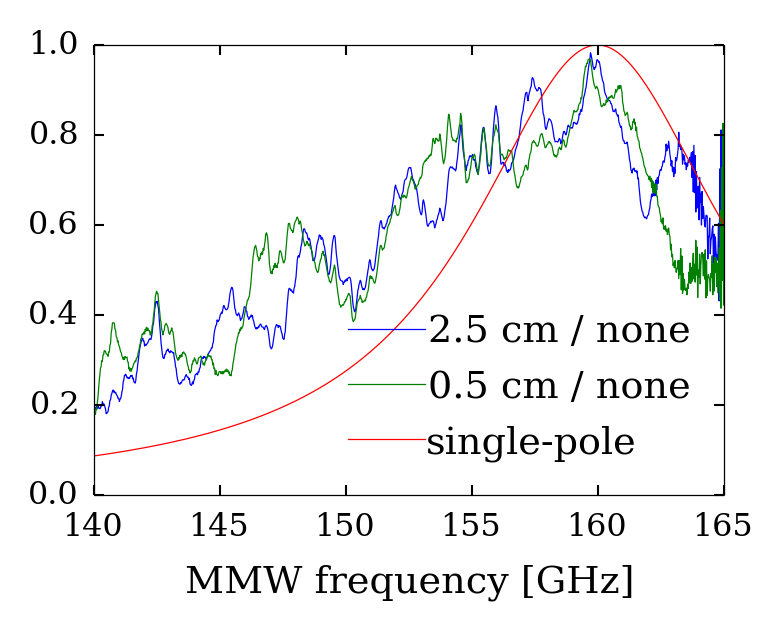

In [110]:
plt.plot(1e-9 * frequency, separated_with_filter / separated_without_filter, label='2.5 cm / none')
plt.plot(1e-9 * frequency, separated_filter_close_to_horn / separated_without_filter, label='0.5 cm / none')
plt.plot(1e-9 * frequency, 1 / (1 + ((frequency - 160e9) / (160e9 * 0.077 / 2))**2), label='single-pole')

plt.xlabel('MMW frequency [GHz]')
plt.legend(loc='best');

In [97]:
for name in ['frequency',
             'centered',
             'offset',
             'with_filter',
             'without_filter',
             'separated_without_filter',
             'separated_with_filter',
             'separated_filter_close_to_horn']:
    np.save('/home/flanigan/' + name + '.npy', globals()[name])